In [29]:
# importing required packages and setting up DR Client

import pandas as pd
import datetime
import datarobot as dr
dr.Client(config_path='/Users/vijay.rajan/my_datarobot_config.yaml')

In [30]:
# setting up the project

filename = 'venta_cluster_hs19_train.csv'
now = datetime.datetime.now().strftime('%Y-%m-%dT%H:%M')
project_name = 'tottus_unidadesventa_{}'.format(now)
proj = dr.Project.create(sourcedata=filename,
                         project_name=project_name,
                         max_wait=3600)
print('Project ID: {}'.format(proj.id))

Project ID: 5e79576137f1f80ecdb56a21


In [31]:
# checking out the default datetime partitioning 

spec = dr.DatetimePartitioningSpecification('id_diaanalisis')
partitioning_preview = dr.DatetimePartitioning.generate(proj.id, spec)

print(partitioning_preview.to_dataframe())

                                             start_date   duration  \
available_training            2018-01-01 00:00:00+00:00  P0Y0M574D   
primary_training              2018-03-03 00:00:00+00:00   P1Y4M26D   
gap                           2019-07-29 00:00:00+00:00    P0Y0M0D   
holdout                       2019-07-29 00:00:00+00:00       P63D   
backtest_0_available_training 2018-01-01 00:00:00+00:00  P0Y0M511D   
backtest_0_primary_training   2018-01-01 00:00:00+00:00   P1Y4M26D   
backtest_0_gap                2019-05-27 00:00:00+00:00    P0Y0M0D   
backtest_0_validation         2019-05-27 00:00:00+00:00       P63D   

                                               end_date  
available_training            2019-07-29 00:00:00+00:00  
primary_training              2019-07-29 00:00:00+00:00  
gap                           2019-07-29 00:00:00+00:00  
holdout                       2019-09-30 00:00:00+00:00  
backtest_0_available_training 2019-05-27 00:00:00+00:00  
backtest_0_primary_tr

In [ ]:
# # setting up backtests with custom start and end dates

# spec.number_of_backtests = 5

# #Create Durantion Strings
# gapDuration = dr.helpers.partitioning_methods.construct_duration_string(years=0, 
#                                                                         months=0, 
#                                                                         days=0,
#                                                                         hours=0, 
#                                                                         minutes=0, 
#                                                                         seconds=0)
# validationDuration = dr.helpers.partitioning_methods.construct_duration_string(years=0, 
#                                                                                months=0,
#                                                                                days=14, 
#                                                                                hours=0, 
#                                                                                minutes=0,
#                                                                                seconds=0)
# holdoutDuration = dr.helpers.partitioning_methods.construct_duration_string(years=0, 
#                                                                             months=0,
#                                                                             days=0, 
#                                                                             hours=0, 
#                                                                             minutes=0,
#                                                                             seconds=0)
# #Create Backtests
# backtest1 = dr.BacktestSpecification(index=0,
#                                      gapDuration=gapDuration,
#                                      validation_start_date = datetime(2019, 8, 1),
#                                      validation_duration = validationDuration)
# backtest2 = dr.BacktestSpecification(index=0,
#                                      gapDuration=gapDuration,
#                                      validation_start_date = datetime(2019, 8, 1),
#                                      validation_duration = validationDuration)
# backtest3 = dr.BacktestSpecification(index=0,
#                                      gapDuration=gapDuration,
#                                      validation_start_date = datetime(2019, 8, 1),
#                                      validation_duration = validationDuration)
# backtest4 = dr.BacktestSpecification(index=0,
#                                      gapDuration=gapDuration,
#                                      validation_start_date = datetime(2019, 8, 1),
#                                      validation_duration = validationDuration)
# backtest5 = dr.BacktestSpecification(index=0,
#                                      gapDuration=gapDuration,
#                                      validation_start_date = datetime(2019, 8, 1),
#                                      validation_duration = validationDuration)


# backtests = [backtest1, backtest2, backtest3, backtest4, backtest5]

In [32]:
# setting up the features known in advance

known_in_advance = ['ID_SUBCLASE', 'ID_CLASE', 'ID_SUPDEPARTAMENTO']
feature_settings = [dr.FeatureSettings(feat_name, 
                                       known_in_advance=True)
                    for feat_name in known_in_advance]

In [33]:
# setting up the calendar

calendar_file=dr.CalendarFile.create('peruvian_holidays.csv')
cal_id = calendar_file.id
print(cal_id, type(cal_id))

5e7957955a5fe675ffa472ac <class 'str'>


In [34]:
# creating custom date time partition project

time_partition=dr.DatetimePartitioningSpecification(datetime_partition_column='id_diaanalisis',
                                                    autopilot_data_selection_method='duration',
                                                    validation_duration='P14D',
                                                    number_of_backtests=5,
                                                    use_time_series=True,
                                                    default_to_known_in_advance=False,
                                                    default_to_do_not_derive=False,
                                                    feature_derivation_window_start=-14,
                                                    feature_derivation_window_end=0,
                                                    feature_settings=feature_settings,
                                                    forecast_window_start=1,
                                                    forecast_window_end=14,
                                                    treat_as_exponential='auto',
                                                    differencing_method='auto',
                                                    multiseries_id_columns=['clave'],
                                                    use_cross_series_features=None,
                                                    aggregation_type=None,
                                                    cross_series_group_by_columns=None,
                                                    calendar_id=cal_id)

print(time_partition)

In [35]:
# kicking off the project

proj.set_target(
    target='unidadesventa',
    partitioning_method=time_partition,
    metric='RMSE',
    max_wait=3600,
    worker_count=-1
)

print(proj.get_leaderboard_ui_permalink())

proj.wait_for_autopilot()

https://app.datarobot.com/projects/5e79576137f1f80ecdb56a21/models
In progress: 20, queued: 3 (waited: 0s)
In progress: 20, queued: 3 (waited: 2s)
In progress: 20, queued: 3 (waited: 3s)
In progress: 20, queued: 3 (waited: 4s)
In progress: 20, queued: 3 (waited: 6s)
In progress: 20, queued: 3 (waited: 8s)
In progress: 20, queued: 3 (waited: 12s)
In progress: 20, queued: 3 (waited: 19s)
In progress: 20, queued: 3 (waited: 33s)
In progress: 20, queued: 3 (waited: 54s)
In progress: 20, queued: 3 (waited: 74s)
In progress: 20, queued: 3 (waited: 95s)
In progress: 20, queued: 3 (waited: 116s)
In progress: 20, queued: 3 (waited: 136s)
In progress: 20, queued: 3 (waited: 157s)
In progress: 20, queued: 3 (waited: 178s)
In progress: 20, queued: 3 (waited: 199s)
In progress: 20, queued: 3 (waited: 219s)
In progress: 20, queued: 3 (waited: 240s)
In progress: 20, queued: 3 (waited: 261s)
In progress: 20, queued: 3 (waited: 282s)
In progress: 20, queued: 3 (waited: 303s)
In progress: 20, queued: 2 

In progress: 1, queued: 0 (waited: 7321s)
In progress: 1, queued: 0 (waited: 7342s)
In progress: 1, queued: 0 (waited: 7362s)
In progress: 1, queued: 0 (waited: 7382s)
In progress: 1, queued: 0 (waited: 7403s)
In progress: 1, queued: 0 (waited: 7423s)
In progress: 1, queued: 0 (waited: 7444s)
In progress: 1, queued: 0 (waited: 7464s)
In progress: 1, queued: 0 (waited: 7485s)
In progress: 1, queued: 0 (waited: 7505s)
In progress: 0, queued: 0 (waited: 7525s)
In progress: 0, queued: 0 (waited: 7546s)
In progress: 0, queued: 0 (waited: 7566s)
In progress: 0, queued: 0 (waited: 7586s)


In [36]:
# choosing the best model

proj.get_models()[:10]

lb = proj.get_models()
valid_models=[m for m in lb if
                m.metrics[proj.metric]['crossValidation']]
best_model=min(valid_models,
                 key=lambda m: m.metrics[proj.metric]['crossValidation'])

print(best_model.model_type)
print(best_model.get_leaderboard_ui_permalink())

AVG Blender
https://app.datarobot.com/projects/5e79576137f1f80ecdb56a21/models/5e796bfc50fbf1678d9a91a1


In [37]:
# unlocking the holdout 
# training the best model on max available data
# getting the 

proj.unlock_holdout()
job=best_model.request_frozen_datetime_model()
retrained_model=job.get_result_when_complete()

print(retrained_model.get_leaderboard_ui_permalink())

https://app.datarobot.com/projects/5e79576137f1f80ecdb56a21/models/5e7978ea64280479961a8984


In [38]:
# uploading the prediction dataset
# computing predictions
# writing out the predictions to a csv file

d=pd.read_csv('venta_cluster_hs19_train.csv')
last_train_date=pd.to_datetime(d['id_diaanalisis']).max()

dataset=proj.upload_dataset(
    'venta_cluster_hs19_test.csv',
    forecast_point=last_train_date
)

pred_job=retrained_model.request_predictions(dataset_id=dataset.id)
preds=pred_job.get_result_when_complete()

preds.to_csv('venta_cluster_hs19_test_output.csv', index=False, encoding='utf8')

Text(0.5, 1.04, 'Feature Impact')

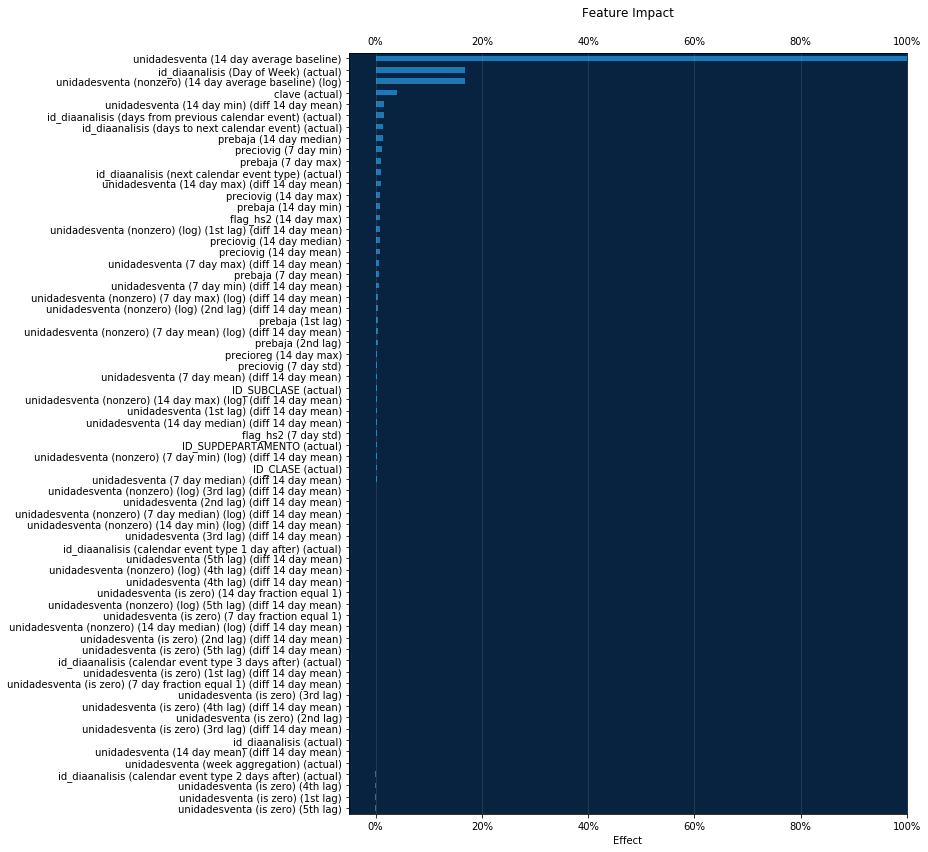

In [42]:
# setting the color palette 

# getting the feature impact for the best model

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import datarobot as dr
import numpy as np
from datarobot.enums import AUTOPILOT_MODE
from datarobot.errors import ClientError

dr_dark_blue = '#08233F'
dr_blue = '#1F77B4'
dr_orange = '#FF7F0E'
dr_red = '#BE3C28'

feature_impacts=best_model.get_or_request_feature_impact()


# Formats the ticks from a float into a percent
percent_tick_fmt=mtick.PercentFormatter(xmax=1.0)

impact_df=pd.DataFrame(feature_impacts)
impact_df.sort_values(by='impactNormalized', ascending=True, inplace=True)

# Positive values are blue, negative are red
bar_colors=impact_df.impactNormalized.apply(lambda x: dr_red if x < 0 else dr_blue)

ax = impact_df.plot.barh(x='featureName', 
                         y='impactNormalized',
                         legend=False,
                         color=bar_colors,
                         figsize=(10, 14))

ax.xaxis.set_major_formatter(percent_tick_fmt)
ax.xaxis.set_tick_params(labeltop=True)
ax.xaxis.grid(True, alpha=0.2)
ax.set_facecolor(dr_dark_blue)

plt.ylabel('')
plt.xlabel('Effect')
plt.xlim((None, 1))  # Allow for negative impact
plt.title('Feature Impact', y=1.04)

In [50]:
# getting the sorted feature impact in a dataframe
# selecting the top n most impactful features
# converting the names of the featues in the featureName column to a list to create a new featuerlist


best_model_feature_impact=pd.DataFrame(best_model.get_feature_impact())

top30=best_model_feature_impact.nlargest(30,['impactNormalized'])

top30_featurelist=top30['featureName'].to_list()

top30_featurelist

/Users/vijay.rajan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: NoRedundancyImpactAvailable: Redundancy detection is not available for this model
  


['unidadesventa (14 day average baseline)',
 'id_diaanalisis (Day of Week) (actual)',
 'unidadesventa (nonzero) (14 day average baseline) (log)',
 'clave (actual)',
 'unidadesventa (14 day min) (diff 14 day mean)',
 'id_diaanalisis (days from previous calendar event) (actual)',
 'id_diaanalisis (days to next calendar event) (actual)',
 'prebaja (14 day median)',
 'preciovig (7 day min)',
 'prebaja (7 day max)',
 'id_diaanalisis (next calendar event type) (actual)',
 'unidadesventa (14 day max) (diff 14 day mean)',
 'preciovig (14 day max)',
 'prebaja (14 day min)',
 'flag_hs2 (14 day max)',
 'unidadesventa (nonzero) (log) (1st lag) (diff 14 day mean)',
 'preciovig (14 day median)',
 'preciovig (14 day mean)',
 'unidadesventa (7 day max) (diff 14 day mean)',
 'prebaja (7 day mean)',
 'unidadesventa (7 day min) (diff 14 day mean)',
 'unidadesventa (nonzero) (7 day max) (log) (diff 14 day mean)',
 'unidadesventa (nonzero) (log) (2nd lag) (diff 14 day mean)',
 'prebaja (1st lag)',
 'unidad

In [57]:
# getting the name of the project
# creating the featurelist in a project
# getting the featurelist id

project=proj.get(proj.id)
top30_features=project.create_modeling_featurelist('top30', top30_featurelist)
top30_features.id

In [72]:
# getting the most accurate model
# getting the project id and the model id of the most accurate model

recommendation_type=dr.enums.RECOMMENDED_MODEL_TYPE.MOST_ACCURATE
recommendations=dr.ModelRecommendation.get(proj.id, recommendation_type)
recommendations

ModelRecommendation(5e79576137f1f80ecdb56a21, 5e796bfc50fbf1678d9a91a1, Most Accurate)